In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
pokemon = pd.read_csv('pokemon.csv')
print(pokemon.shape)
pokemon.head(10)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


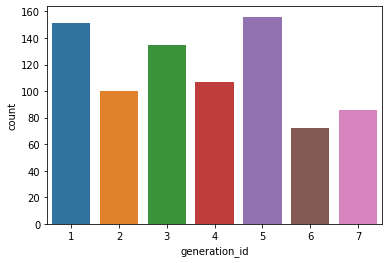

In [3]:
sb.countplot(data = pokemon, x = 'generation_id');

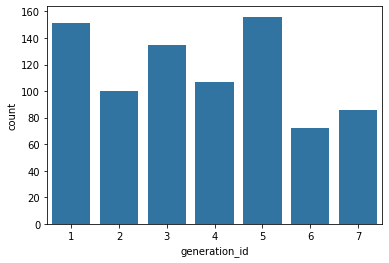

In [4]:
base_color = sb.color_palette()[0]
sb.countplot(data = pokemon, x = 'generation_id', color = base_color);

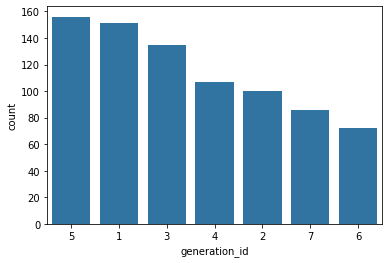

In [5]:
gen_order = pokemon['generation_id'].value_counts().index
sb.countplot(data = pokemon, x = 'generation_id', color = base_color, order = gen_order);

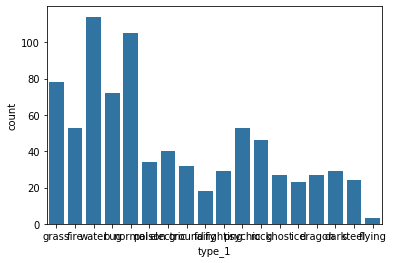

In [6]:
sb.countplot(data = pokemon, x = 'type_1', color = base_color);

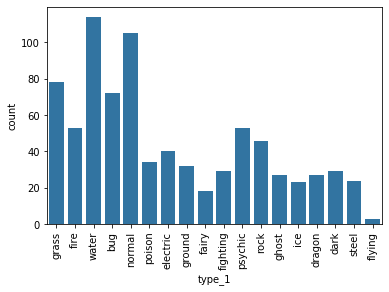

In [7]:
sb.countplot(data = pokemon, x = 'type_1', color = base_color);
plt.xticks(rotation = 90);

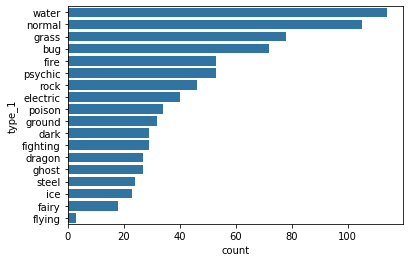

In [8]:
type_order = pokemon['type_1'].value_counts().index;
sb.countplot(data = pokemon, y = 'type_1', color = base_color, order = type_order);

In [9]:
pkmn_types = pokemon.melt(id_vars = ['id','species'],
                          value_vars = ['type_1','type_2'],
                          var_name = 'type_level', value_name = 'type').dropna()
pkmn_types[802:812]

,id,species,type_level,type
802,803,poipole,type_1,poison
803,804,naganadel,type_1,poison
804,805,stakataka,type_1,rock
805,806,blacephalon,type_1,fire
806,807,zeraora,type_1,electric
807,1,bulbasaur,type_2,poison
808,2,ivysaur,type_2,poison
809,3,venusaur,type_2,poison
812,6,charizard,type_2,flying
818,12,butterfree,type_2,flying


In [10]:
type_counts = pkmn_types['type'].value_counts()
type_order = type_counts.index

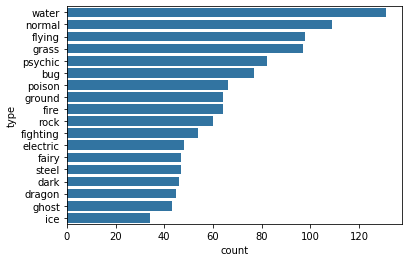

In [11]:
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order);

In [12]:
n_pokemon = pokemon.shape[0]
max_type_count = type_counts[0]
print(n_pokemon)
print(max_type_count)
max_prop = max_type_count / n_pokemon
print(max_prop)

807
131
0.1623296158612144


In [13]:
tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
print(tick_names)

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10', '0.12', '0.14', '0.16']


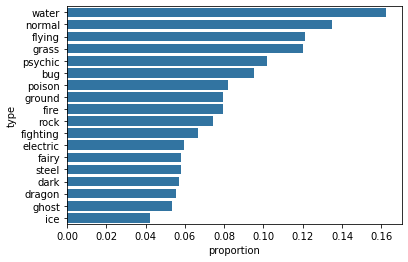

In [14]:
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order);
plt.xticks(tick_props * n_pokemon, tick_names);
plt.xlabel('proportion');

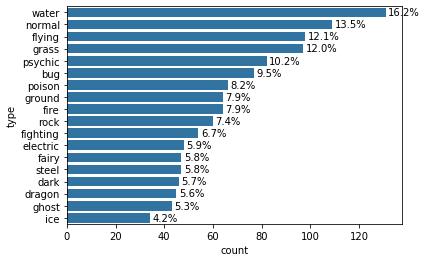

In [15]:
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order);

for i in range(type_counts.shape[0]):
    count = type_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)
    plt.text(count+1, i, pct_string, va = 'center');

In [16]:
pokemon.head(5)

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


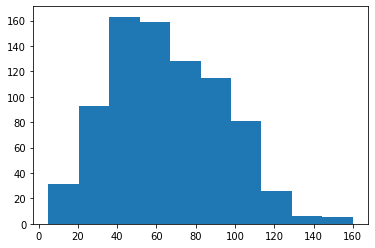

In [17]:
plt.hist(data = pokemon, x = 'speed');

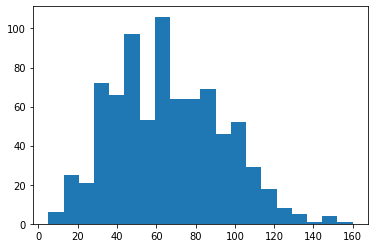

In [18]:
plt.hist(data = pokemon, x = 'speed', bins = 20);

(array([ 0.,  3.,  4., 11., 19., 18., 43., 38., 57., 46., 53., 48., 62.,
        55., 53., 27., 45., 32., 39., 42., 36., 22., 18., 12.,  8.,  5.,
         5.,  0.,  1.,  1.,  3.,  1.]),
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160]),
 <a list of 32 Patch objects>)

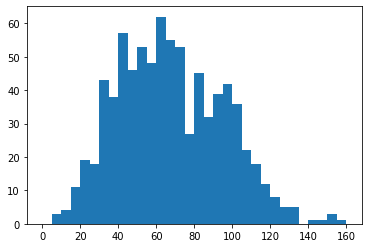

In [19]:
bins = np.arange(0, pokemon['speed'].max()+5,5)
plt.hist(data = pokemon, x = 'speed', bins = bins)

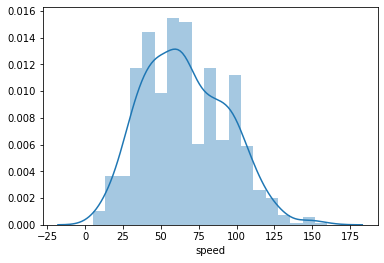

In [20]:
sb.distplot(pokemon['speed'])

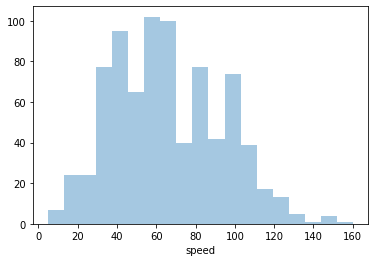

In [21]:
sb.distplot(pokemon['speed'], kde = False)

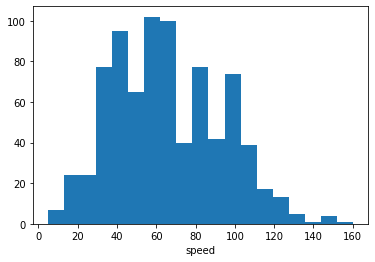

In [22]:
sb.distplot(pokemon['speed'], kde = False, hist_kws = {'alpha' : 1})

[ 0.   0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6
  2.8  3.   3.2  3.4  3.6  3.8  4.   4.2  4.4  4.6  4.8  5.   5.2  5.4
  5.6  5.8  6.   6.2  6.4  6.6  6.8  7.   7.2  7.4  7.6  7.8  8.   8.2
  8.4  8.6  8.8  9.   9.2  9.4  9.6  9.8 10.  10.2 10.4 10.6 10.8 11.
 11.2 11.4 11.6 11.8 12.  12.2 12.4 12.6 12.8 13.  13.2 13.4 13.6 13.8
 14.  14.2 14.4 14.6]


(0, 6)

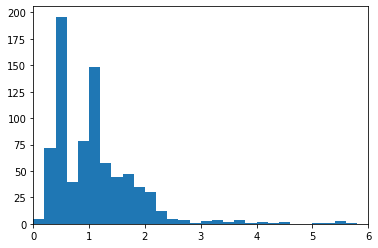

In [23]:
bins = np.arange(0, pokemon['height'].max()+0.2,0.2)
print(bins)
plt.hist(data = pokemon, x = 'height', bins=bins)
plt.xlim(0,6)

(array([680.,  66.,  32.,  15.,   4.,   2.,   1.,   1.,   2.,   4.]),
 array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000.]),
 <a list of 10 Patch objects>)

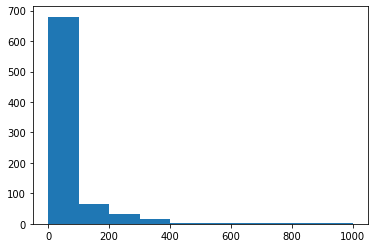

In [24]:
bins = np.arange(0, pokemon['weight'].max()+100,100)
plt.hist(data = pokemon, x = 'weight', bins=bins)

Text(0.5, 0, 'Weight (kg)')

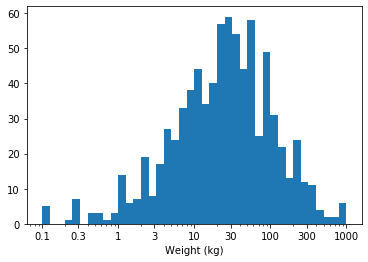

In [25]:
bins = 10 ** np.arange(-1, 3.0+0.1, 0.1)
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(val) for val in ticks]

plt.hist(data = pokemon, x = 'weight', bins=bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('Weight (kg)')

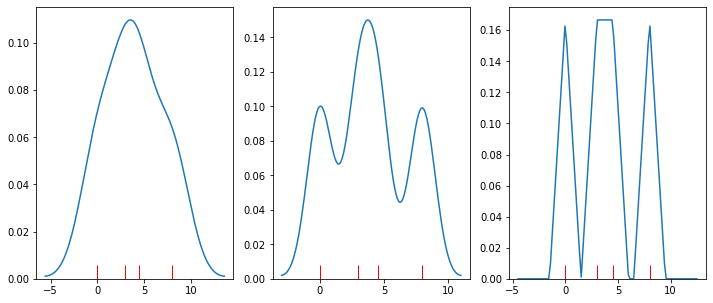

In [26]:
data = [0.0, 3.0, 4.5, 8.0]
plt.figure(figsize = [12, 5])

# left plot: showing kde lumps with the default settings
plt.subplot(1, 3, 1)
sb.distplot(data, hist = False, rug = True, rug_kws = {'color' : 'r'})

# central plot: kde with narrow bandwidth to show individual probability lumps
plt.subplot(1, 3, 2)
sb.distplot(data, hist = False, rug = True, rug_kws = {'color' : 'r'},
            kde_kws = {'bw' : 1})

# right plot: choosing a different, triangular kernel function (lump shape)
plt.subplot(1, 3, 3)
sb.distplot(data, hist = False, rug = True, rug_kws = {'color' : 'r'},
            kde_kws = {'bw' : 1.5, 'kernel' : 'tri'})

In [27]:
fuel_econ = pd.read_csv('./fuel_econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


Text(0, 0.5, 'Highway Fuel Eff. (mpg)')

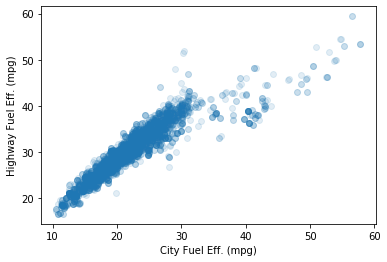

In [28]:
plt.scatter(data = fuel_econ, x = 'city', y = 'highway', alpha = 1/8)
plt.xlabel('City Fuel Eff. (mpg)')
plt.ylabel('Highway Fuel Eff. (mpg)')

Text(0, 0.5, 'CO2 (g/mi)')

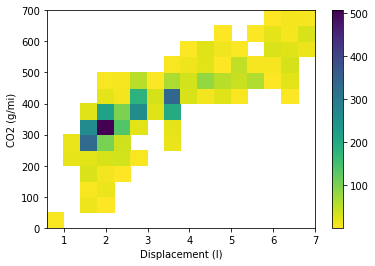

In [29]:
bins_x = np.arange(0.6, fuel_econ['displ'].max()+0.4, 0.4)
bins_y = np.arange(0, fuel_econ['co2'].max()+50, 50)
plt.hist2d(data = fuel_econ, x = 'displ', y = 'co2', bins = [bins_x, bins_y],
          cmap= 'viridis_r', cmin = 0.5)
plt.colorbar()
plt.xlabel('Displacement (l)')
plt.ylabel('CO2 (g/mi)')

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

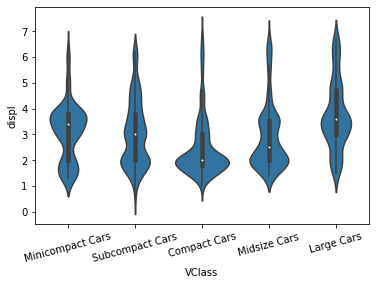

In [30]:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21):
    vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)
    fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)
else:
    fuel_econ['VClass'] = fuel_econ['VClass'].astype('category', ordered = True, 
                                                    categories = sedan_classes)

base_color = sb.color_palette()[0]
sb.violinplot(data = fuel_econ, x = 'VClass', y = 'displ', 
             color = base_color)
plt.xticks(rotation = 15)

In [31]:
fuel_econ = pd.read_csv('./fuel_econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

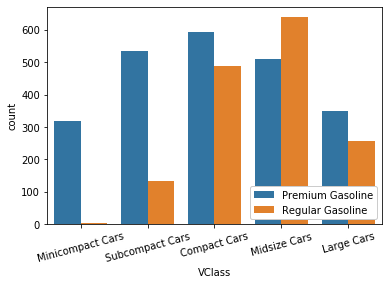

In [68]:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)
fuel_econ_sub = fuel_econ.loc[fuel_econ['fuelType'].isin(['Premium Gasoline', 'Regular Gasoline'])]
# plotting
ax = sb.countplot(data = fuel_econ_sub, x = 'VClass', hue = 'fuelType')
ax.legend(loc = 4, framealpha = 1) # lower right, no transparency
plt.xticks(rotation = 15)

Plot the distribution of combined fuel mileage (column 'comb', in miles per gallon) by manufacturer (column 'make'), for all manufacturers with at least eighty cars in the dataset. Consider which manufacturer order will convey the most information when constructing your final plot. Hint: Completing this exercise will take multiple steps! Add additional code cells as needed in order to achieve the goal.

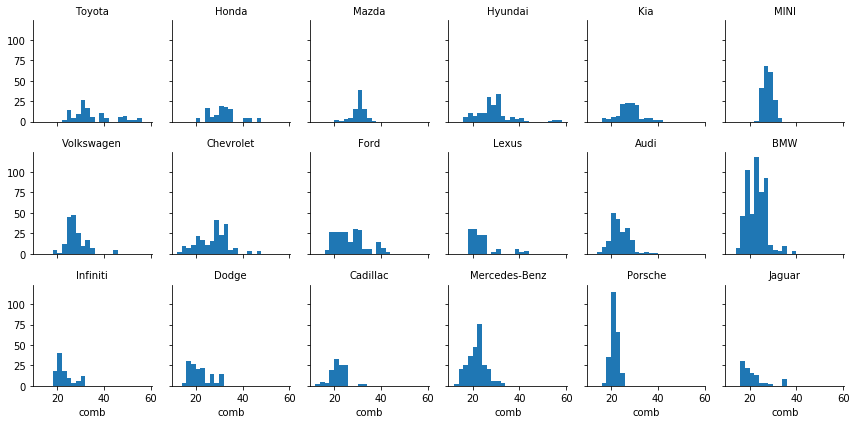

In [71]:
THRESHOLD = 80
make_frequency = fuel_econ['make'].value_counts()
idx = np.sum(make_frequency > THRESHOLD)
most_makes = make_frequency.index[:idx]
fuel_econ_sub = fuel_econ.loc[fuel_econ['make'].isin(most_makes)]
make_means = fuel_econ_sub.groupby('make').mean()
comb_order = make_means.sort_values('comb', ascending = False).index
base_color = sb.color_palette()[0]

g = sb.FacetGrid(data = fuel_econ_sub, col = 'make', col_wrap = 6, height = 2, col_order = comb_order)
g.map(plt.hist, 'comb', bins = np.arange(12, fuel_econ_sub['comb'].max()+2, 2))
g.set_titles('{col_name}')

Continuing on from the previous task, plot the mean fuel efficiency for each manufacturer with at least 80 cars in the dataset.

Text(0.5, 0, 'Average Combined Fuel Eff. (mpg)')

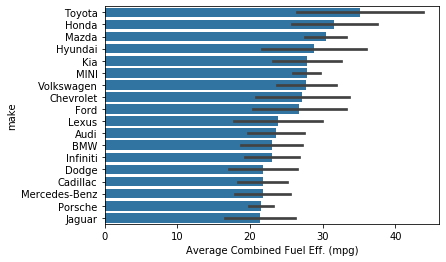

In [67]:
sb.barplot(data = fuel_econ_sub, x = 'comb', y = 'make', color = base_color, order = comb_order, ci = 'sd')
plt.xlabel('Average Combined Fuel Eff. (mpg)')